# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mokan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='bitcoin', language='en')
bitcoin_news['articles']

[{'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Justine Calma',
  'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
  'description': 'ExxonMobil and other fossil fuel companies have turned to Bitcoin mining to address a gas problem. But their plans come with risks.',
  'url': 'https://www.theverge.com/2022/5/4/23055761/exxonmobil-cryptomining-bitcoin-methane-gas',
  'urlToImage': 'https://cdn.vox-cdn.com/thumbor/BZdljrBbt8tBl6oCCnckcDKqe6g=/0x90:4608x2503/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23435975/1240300988.jpg',
  'publishedAt': '2022-05-04T12:00:00Z',
  'content': 'A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]'},
 {'source': {'id': 'engadget', 'name': 'Engadget'},
  'author': 'Mariella Moon',
  'title': 'Wikipedia editors vote to block cryptocur

In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_news['articles']


[{'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Emma Roth',
  'title': 'US blames North Korean hacker group for $625 million Axie Infinity theft',
  'description': 'The US Department of Treasury has attributed the $625 Axie Infinity theft to Lazarus, a North Korean hacking group with ties to the country’s intelligence agency.',
  'url': 'https://www.theverge.com/2022/4/14/23025739/north-korean-hacker-lazarus-axie-infinity-cryptocurrency-hack-theft-us-blames',
  'urlToImage': 'https://cdn.vox-cdn.com/thumbor/n8TGCqcud7UHPIbtgxLi10Owa5I=/0x52:1018x585/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23374959/Screen_Shot_2022_03_30_at_10.10.00_AM.png',
  'publishedAt': '2022-04-14T21:43:57Z',
  'content': 'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]'},
 {'source': {'id': 'ars-technica', 'nam

In [6]:
# Create the Bitcoin sentiment scores DataFrame
analyzer.polarity_scores(bitcoin_news["articles"][0]["content"])
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
1,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
4,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807


In [7]:
# Create the Ethereum sentiment scores DataFrame
analyzer.polarity_scores(ethereum_news["articles"][0]["content"])
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
3,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
4,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.059050,0.077900,0.061350,0.860750
std,0.402490,0.065217,0.065254,0.092284
min,-0.690800,0.000000,0.000000,0.557000
25%,-0.273200,0.031500,0.000000,0.815750
50%,0.077150,0.077000,0.063000,0.885000
75%,0.355075,0.091750,0.072500,0.924250
max,0.750600,0.202000,0.241000,0.958000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.00000,20.00000,20.000000,20.000000
mean,-0.12974,0.04120,0.070250,0.888550
std,0.40896,0.05516,0.071528,0.080061
min,-0.78450,0.00000,0.000000,0.681000
25%,-0.31745,0.00000,0.000000,0.840250
50%,-0.24975,0.00000,0.063000,0.921000
75%,0.10270,0.07650,0.077750,0.937000
max,0.73510,0.18800,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A:Bitcoin 

Q: Which coin had the highest compound score?

A: Ethereum (using max value of the compound score)

Q. Which coin had the highest positive score?

A: Ethereum (using max value of the positive score)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
#print(sw)

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
#sw.append('like')

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    #create list of words
    words = word_tokenize(text)

    #convert to lowercase
    words = list(filter(lambda w: w.lower(), words))

    #remove punctuation
    words = list(filter(lambda w: w not in punctuation, words))

    #remove stopwords
    words = list(filter(lambda w: w.lower() not in sw, words))
    
    #lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in words]

    #this time, we REALLY convert to lowercase
    tokens = [word.lower() for word in tokens]

    return tokens

In [13]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mokan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens']= bitcoin_df.text.apply(tokenizer)
bitcoin_df

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
1,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, cr..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, images, value, bitcoin,..."
4,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807,"[youve, ever, felt, like, introducing, vegas-s..."
5,2022-05-06,Cryptocurrency mixers are sometimes used to he...,-0.4404,0.202,0.241,0.557,"[cryptocurrency, mixer, sometimes, used, help,..."
6,2022-04-12,April 12 (Reuters) - A crypto platform's pledg...,-0.1280,0.050,0.063,0.888,"[april, 12, reuters, crypto, platform, 's, ple..."
7,2022-04-11,The news: Block CEO Jack Dorsey announced thre...,0.0516,0.084,0.078,0.838,"[news, block, ceo, jack, dorsey, announced, th..."
8,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[18, 15, poster, participating, including, sto..."
9,2022-05-09,"BTC fell to its lowest level since last July, ...",0.1027,0.076,0.066,0.859,"[btc, fell, lowest, level, since, last, july, ..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_df['tokens']= ethereum_df.text.apply(tokenizer)
ethereum_df

,date,text,compound,positive,negative,neutral,tokens
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[us, department, treasury, say, lazarus, behin..."
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[18, 15, poster, participating, including, sto..."
2,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, ``, crypto, brows..."
3,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multi-billion, dollar, cryptocurrency, compan..."
4,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."
5,2022-04-14,The news: A former developer of the cryptocurr...,-0.2960,0.057,0.114,0.829,"[news, former, developer, cryptocurrency, ethe..."
6,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[april, 26, reuters, ether, promised, better, ..."
7,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[ethereum, preparing, upgrade, thats, describe..."
8,2022-04-18,Dogecoiners unite! Movie theater chain AMC has...,0.4003,0.078,0.000,0.922,"[dogecoiners, unite, movie, theater, chain, am..."
9,2022-05-01,There's a new metaverse project from the creat...,-0.2732,0.000,0.063,0.937,"['s, new, metaverse, project, creator, ``, bor..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigrams = Counter(ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2))
#print(dict(bitcoin_bigrams))

In [ ]:
# Generate the Ethereum N-grams where N=2
ethereum_bigrams= Counter(ngrams(tokenizer(ethereum_df.text.str.cat()), n=2))
#print(dict(ethereum_bigrams))

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(bitcoin_bigrams.most_common(10)))
#print(token_count(bitcoin_bigrams))-only shows 3 results of most common

{('world', "'s"): 6, ("'s", 'biggest'): 4, ('char', 'may'): 3, ('reuters', 'bitcoin'): 3, ('previous', 'close'): 3, ('close', 'bitcoin'): 3, ('bitcoin', 'world'): 3, ('biggest', 'best-known'): 3, ('best-known', 'cryptocurrency'): 3, ('getty', 'images'): 2}


In [21]:
# Use token_count to get the top 10 words for Ethereum
print(dict(ethereum_bigrams.most_common(10)))

{('reuters', 'bitcoin'): 3, ('previous', 'close'): 3, ('close', 'bitcoin'): 3, ('bitcoin', 'world'): 3, ('world', "'s"): 3, ("'s", 'biggest'): 3, ('biggest', 'best-known'): 3, ('best-known', 'cryptocurrency'): 3, ('poster', 'participating'): 2, ('yuga', 'labs'): 2}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

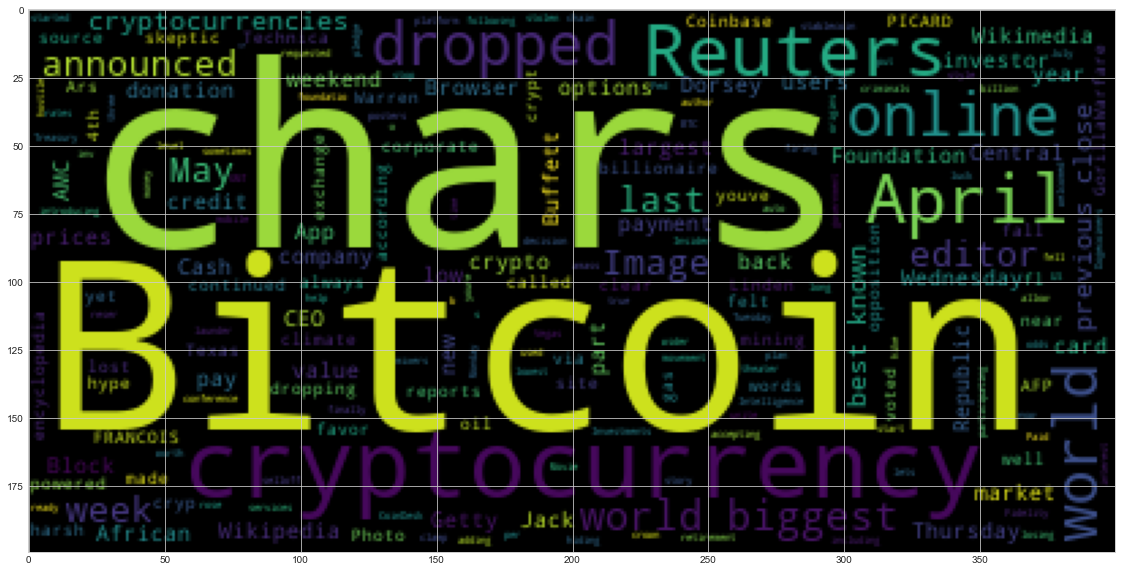

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(wc)

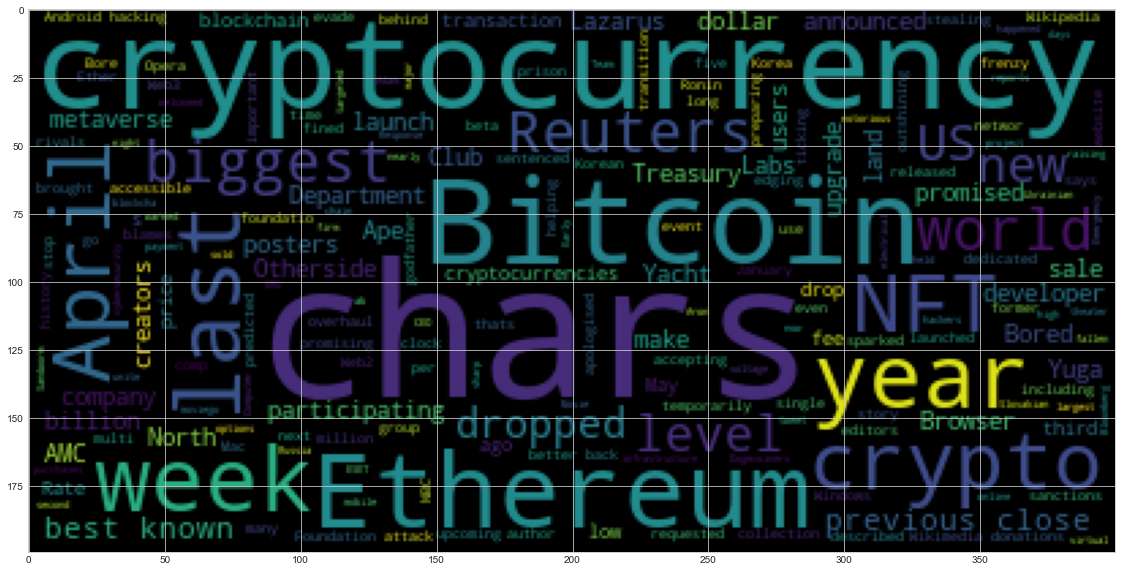

In [24]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 8.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
bitcoin_ner = bitcoin_df.text.str.cat()

In [29]:
# Run the NER processor on all of the text
bitcoin_proc= nlp(bitcoin_ner)

# Add a title to the document
bitcoin_proc.user_data['title']='Bitcoin NER'

In [30]:
# Render the visualization
displacy.render(bitcoin_proc, style='ent', jupyter=True)

In [31]:
# List all Entities
print(bitcoin_proc.ents)

(Linden, Texas, April 4th, 2022, Photo, FRANCOIS PICARD/AFP, Getty Images, the Wikimedia Foundation's, Ars Technica, GorillaWarfare, Buffett, the weekend, Getty Images
, the weekend, 34,000, 27,630, Coinbase, Last week, Fidelity Investments, the US Treasury, chars]April 12, Reuters, $10 billion, Block, Jack Dorsey, three, Thursday, CoinDesk, Cash App, 15, More than 200, Wikipedia, the Wikimedia Foundation, last July, 33,000, the week, last week, Fed, 9, Reuters, 7.81%, 31,333.41, GMT, Monday, 2,655.98, 35%, Reuters, 5.1%, 38,391.36, Tuesday, 2,229.82, 16%, year, +339 chars]May 4, Reuters, 5.7%, 39,862.84, Wednesday, 2,102.94, 20.9%, year, AMC, April 15, AMC, Adam Aron, Crypto Browser, January, Windows, Mac, Android, chars]The Central African Republic, second, El Salvador, Wednesday, Faustin Archange, Touadera, Reuters, - Block Inc, Jack Dorsey, Thursday, the first quarter, Nasdaq, April 28, Reuters)


---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
ethereum_ner = ethereum_df.text.str.cat()

In [33]:
# Run the NER processor on all of the text
ethereum_proc= nlp(ethereum_ner)

# Add a title to the document
ethereum_proc.user_data['title']='Ethereum NER'

In [34]:
# Render the visualization
displacy.render(ethereum_proc, style='ent', jupyter=True)

In [35]:
# List all Entities
entities=ethereum_proc.ents
entities
#print(ethereum_proc.ents)

(The US Department of Treasury,
 The US Treasury Department,
 North Korean,
 $625 million,
 Ronin,
 15,
 More than 200,
 Wikipedia,
 the Wikimedia Foundation,
 Crypto Browser,
 January,
 Windows, Mac,
 Android,
 Ethereum,
 Yuga Labs,
 Yacht Club,
 Yuga Labs,
 Otherside NFT,
 April 30,
 NFT,
 Ethereum,
 more than five years,
 100,000,
 North Korea,
 US,
 NBC News,
 chars]April 26,
 Reuters,
 No.2,
 second,
 AMC,
 April 15,
 AMC,
 Adam Aron,
 Last night,
 Bloomberg,
 nearly a third,
 a billion dollars,
 chars]40 days ago,
 47,454,
 34,007,
 28%.About a third,
 this week,
 this week,
 the Ukrainian Computer Emergency Response Team,
 Slovakian,
 Russia,
 Ethereum,
 Merge,
 a few months after June,
 first,
 a year and a half ago,
 The Order Flow,
 Dan Robinson,
 Georgios Konstantopoulos',
 August 20,
 26,
 Reuters,
 5.1%,
 38,391.36,
 Tuesday,
 2,229.82,
 16%,
 year,
 +339 chars]May 4,
 Reuters,
 5.7%,
 39,862.84,
 Wednesday,
 2,102.94,
 20.9%,
 year,
 9,
 Reuters,
 7.81%,
 31,333.41,
 GMT,

---